#**Regresión logística**

Al igual que la regresión lineal múltiple, la regresión logística es una técnica para comprobar hipótesis y relaciones. Tiene la caracteristica adicional de permitir una variable de respuesta de tipo categórica.


![DiferenciaRegresionLineal](https://miro.medium.com/max/640/0*gKOV65tvGfY8SMem.png)

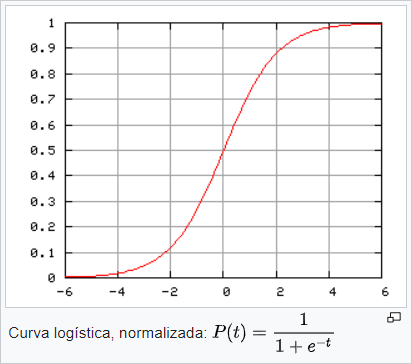

##**Base de datos del titanic**

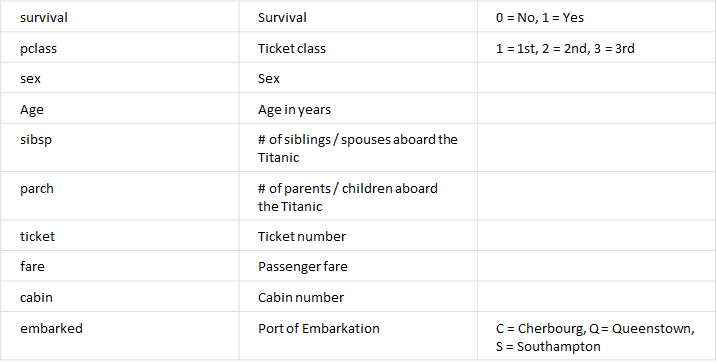


In [ ]:
import pandas as pd
import statsmodels.api as sm

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/adiacla/bigdata/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#Verificar nulos
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df = df.drop('Cabin', axis = 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#**Modelo de regresión logística**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [ ]:
x =  df.iloc[:,[5,6,7]]
y =  df.Survived
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.665234
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                 0.01416
Time:                        11:42:47   Log-Likelihood:                -473.65
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                  0.001108
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0135      0.003     -5.273      0.000      -0.019      -0.008
SibSp         -0.1952      0.

¿Qué pasa si se incluye el sexo?

In [ ]:
freq = df.groupby(['Sex']).count()
freq

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
Sex,,,,,,,,,,
female,259,259,259,259,259,259,259,259,259,259
male,453,453,453,453,453,453,453,453,453,453


In [ ]:
df["Sex2"] = 0
df.Sex2.loc[df.Sex=="female"] = 1
df.Sex2.loc[df.Sex=="male"] = 0
df

<ipython-input-51-8d0d7571fd9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex2"] = 0
<ipython-input-51-8d0d7571fd9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex2.loc[df.Sex=="female"] = 1
<ipython-input-51-8d0d7571fd9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex2.loc[df.Sex=="male"] = 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
 11  Sex2         712 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 72.3+ KB


In [ ]:
x =  df.iloc[:,[5,6,11]]
y =  df.Survived
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.530131
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                  0.2144
Time:                        11:42:47   Log-Likelihood:                -377.45
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.855e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0334      0.003     -9.724      0.000      -0.040      -0.027
SibSp         -0.4542      0.

In [ ]:
df.Age.describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
'''ninos = df.Survived
ninos.loc[df.Age<12]=1
ninos.loc[df.Age>=12]=0
ninos'''

'ninos = df.Survived\nninos.loc[df.Age<12]=1\nninos.loc[df.Age>=12]=0\nninos'

In [ ]:
'''df["Ninos"] = ninos
df.info()'''

'df["Ninos"] = ninos\ndf.info()'

In [ ]:
'''freq = df.groupby(['Ninos']).count()
freq'''

"freq = df.groupby(['Ninos']).count()\nfreq"

In [ ]:
x =  df.iloc[:,[5,6,11]]
y =  df.Survived
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.530131
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                  0.2144
Time:                        11:42:47   Log-Likelihood:                -377.45
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.855e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0334      0.003     -9.724      0.000      -0.040      -0.027
SibSp         -0.4542      0.

#**Entrenamiento, pruebas y predicciones**

In [ ]:
from sklearn.model_selection import train_test_split

#Predicciones con scikit-learn
train, test = train_test_split(df, test_size = 0.20)
print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  569
Ejemplos usados para test:  143


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 775 to 323
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  143 non-null    int64  
 1   Survived     143 non-null    int64  
 2   Pclass       143 non-null    int64  
 3   Name         143 non-null    object 
 4   Sex          143 non-null    object 
 5   Age          143 non-null    float64
 6   SibSp        143 non-null    int64  
 7   Parch        143 non-null    int64  
 8   Ticket       143 non-null    object 
 9   Fare         143 non-null    float64
 10  Embarked     143 non-null    object 
 11  Sex2         143 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 14.5+ KB


In [ ]:
#Se definen las variables
x_train = train.iloc[:,[5,6,7,11]]
y_train = train.Survived
x_test = test.iloc[:,[5,6,7,11]]
y_test = test.Survived

In [ ]:
logit_model=sm.Logit(y_train, x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.521877
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  569
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                  0.2280
Time:                        11:42:48   Log-Likelihood:                -296.95
converged:                       True   LL-Null:                       -384.66
Covariance Type:            nonrobust   LLR p-value:                 8.609e-38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0356      0.004     -8.904      0.000      -0.043      -0.028
SibSp         -0.3667      0.

In [ ]:

# Realizar predicciones sobre el dataset de pruebas
yhat = result.predict(x_test)
prediccion = list(map(round, yhat))
  
# Comparar los valores de predicciones con los valores reales
print('Valores reales', list(y_test))
print('Predicciones :', prediccion)

Valores reales [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
Predicciones : [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]


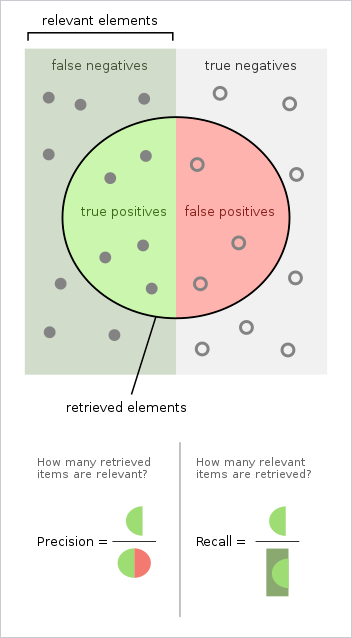

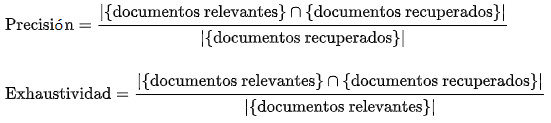

con el modelo , tomar los valores reales y las predicciones , buscar la precision y la exhaustividad, se debe usar el modelo del taller